In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("paper", font_scale=1.6)
sns.set_style('whitegrid')
# sns.set_palette('Set3')
import os
os.listdir('csv')

['20201203RLuc.csv',
 '20201125Rluc.csv',
 '20201210LUMIendpoint3.csv',
 '20201216_LUMI_endpoint3.csv',
 '20201111RLuc.csv',
 '20201104RLuc.csv']

In [2]:
files = [pd.read_csv('csv/{}'.format(i))[:6] for i in os.listdir('csv')]

In [3]:
## Drop pVD24, which is control (no RLuc)
files = [i.drop('pVD24', axis=1) for i in files]

In [4]:
index = pd.read_csv('RLuc_Index.csv')
index['# Reps'] = index['pVD'].apply(lambda x: [x in i.columns for i in files].count(True))
index = index[index['# Reps'] != 0].reset_index(drop=True)
index

,TIsigner ID,First 30 nt,pVD,Type,Company,Full Sequence,Opening Energy,Expression Score,# Reps
0,RLuc-TI-002,ATGACATCAAAAGTATACGACCCAGAGCAG,pVD54,Optimised,NaN,ATGACATCAAAAGTATACGACCCAGAGCAGAGGAAACGGATGATAA...,5.77,97.63,4
1,RLuc-TI-003,ATGACAAGTAAAGTTTATGACCCAGAGCAG,pVD55,Optimised,NaN,ATGACAAGTAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.22,97.29,3
2,RLuc-TI-004,ATGACCAGCAAAGTTTATGACCCAGAGCAG,pVD56,Optimised,NaN,ATGACCAGCAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.36,97.15,3
3,RLuc-TI-005,ATGACAAGCAAAGTTTATGACCCAGAGCAG,pVD57,Optimised,NaN,ATGACAAGCAAAGTTTATGACCCAGAGCAGAGGAAACGGATGATAA...,6.38,97.12,3
4,RLuc-TI-006,ATGACTTCGAAAGTTTATGATCCAGAACAG,pVD58,Optimised,NaN,ATGACTTCGAAAGTTTATGATCCAGAACAGAGGAAACGGATGATAA...,10.13,80.31,3
5,RLuc-TI-007,ATGACATCAAAAGTTTATGATCCAGAACAA,pVD59,Optimised,NaN,ATGACATCAAAAGTTTATGATCCAGAACAAAGGAAACGGATGATAA...,10.38,77.87,3
6,RLuc-TI-008,ATGACGTCGAAAGTTTACGATCCAGAACAA,pVD60,Optimised,NaN,ATGACGTCGAAAGTTTACGATCCAGAACAAAGGAAACGGATGATAA...,9.90,82.37,3
7,RLuc-TI-009,ATGACATCGAAAGTTTACGATCCAGAACAA,pVD61,Optimised,NaN,ATGACATCGAAAGTTTACGATCCAGAACAAAGGAAACGGATGATAA...,9.93,82.11,3
8,RLuc-TI-010,ATGACCTCGAAAGTTTATGACCCAGAACAA,pVD62,Optimised,NaN,ATGACCTCGAAAGTTTATGACCCAGAACAAAGGAAACGGATGATAA...,9.55,85.25,3
9,RLuc-001(Native),ATGACTTCGAAAGTTTATGATCCAGAACAA,pVD26,Native,NaN,ATGACTTCGAAAGTTTATGATCCAGAACAAAGGAAACGGATGATAA...,13.15,44.74,6


In [5]:
## Check if native is in all dataframes
['pVD26' in i.columns for i in files]

[True, True, True, True, True, True]

In [6]:
means = [i[:6].groupby('Time').apply(np.mean) for i in files]
means[0]

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62
Time,,,,,,,,
Induced,22232.333333,21689.333333,19421.333333,19226.333333,21107.000000,25724.666667,19193.000000,16534.000000
Uninduced,2976.333333,3557.000000,2427.000000,2376.333333,2052.333333,2004.666667,2664.666667,2630.666667


In [7]:
pd.concat(means)

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD27,pVD31,pVD32,pVD33,pVD34,pVD54,pVD57
Time,,,,,,,,,,,,,,,
Induced,22232.333333,21689.333333,19421.333333,19226.333333,21107.000000,25724.666667,19193.000000,16534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,2976.333333,3557.000000,2427.000000,2376.333333,2052.333333,2004.666667,2664.666667,2630.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,22128.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27727.000000,30873.666667,25641.333333,28621.333333,29167.000000,20515.666667,17637.000000
Uninduced,2101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5614.000000,5840.333333,3412.333333,5606.666667,8186.333333,2735.000000,2324.000000
Induced,35862.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48832.666667,54645.666667,55336.333333,49152.666667,52458.333333,33643.666667,32086.000000
Uninduced,2572.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5925.666667,6602.000000,4567.333333,6943.333333,11745.666667,2836.666667,2460.333333
Induced,26398.666667,34825.000000,28993.666667,33445.666667,28060.000000,37521.000000,30207.666667,35110.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,2145.000000,2441.333333,3025.333333,2994.666667,2923.000000,2987.000000,2630.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,16767.600000,17872.400000,16278.600000,15111.400000,NaN,22253.600000,15298.200000,12708.800000,NaN,NaN,NaN,NaN,NaN,18845.600000,NaN


In [8]:
# normalise by native
normalised = [i.div(i['pVD26'], axis=0) for i in means]
normalised[0]

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62
Time,,,,,,,,
Induced,1.0,0.975576,0.873563,0.864792,0.949383,1.157084,0.863292,0.743692
Uninduced,1.0,1.195095,0.815433,0.798410,0.689551,0.673536,0.895285,0.883862


In [9]:
## All constructs
all_const = pd.concat(normalised)
all_const

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD27,pVD31,pVD32,pVD33,pVD34,pVD54,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,0.975576,0.873563,0.864792,0.949383,1.157084,0.863292,0.743692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.195095,0.815433,0.798410,0.689551,0.673536,0.895285,0.883862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.252990,1.395189,1.158738,1.293405,1.318064,0.927108,0.797020
Uninduced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.672061,2.779787,1.624147,2.668571,3.896399,1.301761,1.106140
Induced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.361670,1.523762,1.543021,1.370593,1.462770,0.938134,0.894699
Uninduced,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.303914,2.566874,1.775791,2.699585,4.566744,1.102903,0.956584
Induced,1.0,1.319195,1.098300,1.266945,1.062932,1.421322,1.144288,1.330004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uninduced,1.0,1.138151,1.410412,1.396115,1.362704,1.392541,1.226107,0.941259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Induced,1.0,1.065889,0.970837,0.901226,NaN,1.327179,0.912367,0.757938,NaN,NaN,NaN,NaN,NaN,1.123929,NaN


In [11]:
### Final mean of replicates
final = pd.concat(normalised).groupby('Time').apply(np.mean)
final

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD27,pVD31,pVD32,pVD33,pVD34,pVD54,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.120220,0.980900,1.010988,0.915738,1.301861,0.973315,0.943878,1.330277,1.615649,1.371552,1.382901,1.438540,1.002940,0.879433
Uninduced,1.0,1.291363,1.221455,1.142514,1.155231,1.157308,0.984861,0.877792,2.803849,3.041509,1.837133,3.200716,5.123287,1.267103,1.074399


In [12]:

def scatter_text(x, y, text_column, data, title, xlabel=None, ylabel=None, ax=None):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, s=50, ax=ax)
    # Add text besides each point
    for line in range(0, data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='light')
    # Set title and axis labels
    plt.suptitle(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
    return p1

In [13]:
temp_df = final.transpose().reset_index()
temp_df = temp_df.rename(columns={'index':'pVD'})
plot_df = temp_df.merge(index[['Expression Score', 'pVD', 'Company']])
plot_df['Full name'] = plot_df['pVD'] + ' (' + plot_df['Company'].astype(str) + ')'
plot_df['Full name'] = plot_df['Full name'].apply(lambda x: x if x.split(' ')[1] != '(nan)' else x.split(' ')[0])
plot_df

,pVD,Induced,Uninduced,Expression Score,Company,Full name
0,pVD26,1.000000,1.000000,44.74,NaN,pVD26
1,pVD55,1.120220,1.291363,97.29,NaN,pVD55
2,pVD56,0.980900,1.221455,97.15,NaN,pVD56
3,pVD58,1.010988,1.142514,80.31,NaN,pVD58
4,pVD59,0.915738,1.155231,77.87,NaN,pVD59
5,pVD60,1.301861,1.157308,82.37,NaN,pVD60
6,pVD61,0.973315,0.984861,82.11,NaN,pVD61
7,pVD62,0.943878,0.877792,85.25,NaN,pVD62
8,pVD27,1.330277,2.803849,83.34,GeneArt,pVD27 (GeneArt)
9,pVD31,1.615649,3.041509,68.97,IDT,pVD31 (IDT)


In [14]:
from scipy.stats import spearmanr

spearmanr(plot_df['Induced'], plot_df['Expression Score']), \
spearmanr(plot_df['Uninduced'], plot_df['Expression Score']), 


(SpearmanrResult(correlation=-0.0857142857142857, pvalue=0.7613341261907667),
 SpearmanrResult(correlation=0.21071428571428572, pvalue=0.450957865215285))

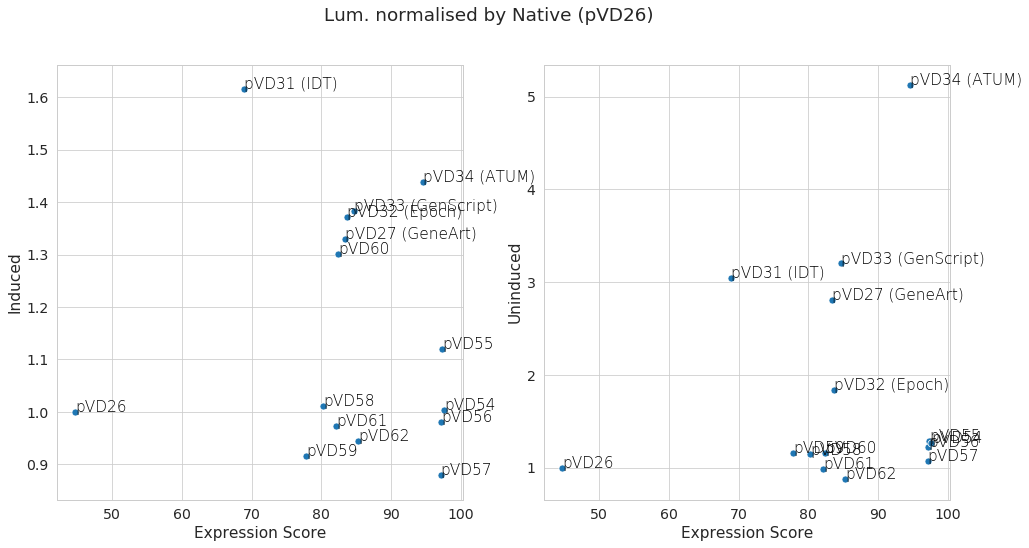

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axes = ax.flatten()

for i, v in enumerate(['Induced', 'Uninduced']):
    
    scatter_text(x='Expression Score', y=v, text_column='Full name',\
                title='Lum. normalised by Native (pVD26)', data=plot_df, ax=axes[i]);
    
plt.savefig('luciferase_normalised_native.pdf', bbox_inches='tight', pad_inches=0);

#### For website

In [16]:
## Sequences
index[['First 30 nt', 'Opening Energy', 'Expression Score', 'Type', 'Company', 'Full Sequence']].to_json(orient='records')

'[{"First 30 nt":"ATGACATCAAAAGTATACGACCCAGAGCAG","Opening Energy":5.77,"Expression Score":97.63,"Type":"Optimised","Company":null,"Full Sequence":"ATGACATCAAAAGTATACGACCCAGAGCAGAGGAAACGGATGATAACTGGTCCGCAGTGGTGGGCCAGATGTAAACAAATGAATGTTCTTGATTCATTTATTAATTATTATGATTCAGAAAAACATGCAGAAAATGCTGTTATTTTTTTACATGGTAACGCGGCCTCTTCTTATTTATGGCGACATGTTGTGCCACATATTGAGCCAGTAGCGCGGTGTATTATACCAGATCTTATTGGTATGGGCAAATCAGGCAAATCTGGTAATGGTTCTTATAGGTTACTTGATCATTACAAATATCTTACTGCATGGTTTGAACTTCTTAATTTACCAAAGAAGATCATTTTTGTCGGCCATGATTGGGGTGCTTGTTTGGCATTTCATTATAGCTATGAGCATCAAGATAAGATCAAAGCAATAGTTCACGCTGAAAGTGTAGTAGATGTGATTGAATCATGGGATGAATGGCCTGATATTGAAGAAGATATTGCGTTGATCAAATCTGAAGAAGGAGAAAAAATGGTTTTGGAGAATAACTTCTTCGTGGAAACCATGTTGCCATCAAAAATCATGAGAAAGTTAGAACCAGAAGAATTTGCAGCATATCTTGAACCATTCAAAGAGAAAGGTGAAGTTCGTCGTCCAACATTATCATGGCCTCGTGAAATCCCGTTAGTAAAAGGTGGTAAACCTGACGTTGTACAAATTGTTAGGAATTATAATGCTTATCTACGTGCAAGTGATGATTTACCAAAAATGTTTATTGAATCGGATCCAGGATTCTTTTCCAATGCTATTGTTGAAGGCGCCAAGAAGTTTCCTAATACTGAATTTGTCAAAGTAAAAGGTCTT

In [17]:
def getVal(pvd, df, Type):
    try:
        return df[pvd][Type]
    except Exception:
        pass

In [18]:
fl_df = pd.DataFrame(columns=['Induced', 'Uninduced'], index=index.pVD)

for _, v in enumerate(index.pVD):
    fl_df.loc[v]['Induced'] = np.round([ q for q in [getVal(v, i, 'Induced') for i in normalised] if q != None], 2)
    fl_df.loc[v]['Uninduced'] = np.round([q for q in [getVal(v, i, 'Uninduced') for i in normalised] if q!= None], 2)
fl_df

,Induced,Uninduced
pVD,,
pVD54,"[0.93, 0.94, 1.12, 1.02]","[1.3, 1.1, 1.49, 1.18]"
pVD55,"[0.98, 1.32, 1.07]","[1.2, 1.14, 1.54]"
pVD56,"[0.87, 1.1, 0.97]","[0.82, 1.41, 1.44]"
pVD57,"[0.8, 0.89, 0.95]","[1.11, 0.96, 1.16]"
pVD58,"[0.86, 1.27, 0.9]","[0.8, 1.4, 1.23]"
pVD59,"[0.95, 1.06, 0.73]","[0.69, 1.36, 1.41]"
pVD60,"[1.16, 1.42, 1.33]","[0.67, 1.39, 1.41]"
pVD61,"[0.86, 1.14, 0.91]","[0.9, 1.23, 0.83]"
pVD62,"[0.74, 1.33, 0.76]","[0.88, 0.94, 0.81]"


In [19]:
types = ['Induced', 'Uninduced']

In [26]:
final = final.round(2)
final

,pVD26,pVD55,pVD56,pVD58,pVD59,pVD60,pVD61,pVD62,pVD27,pVD31,pVD32,pVD33,pVD34,pVD54,pVD57
Time,,,,,,,,,,,,,,,
Induced,1.0,1.12,0.98,1.01,0.92,1.30,0.97,0.94,1.33,1.62,1.37,1.38,1.44,1.00,0.88
Uninduced,1.0,1.29,1.22,1.14,1.16,1.16,0.98,0.88,2.80,3.04,1.84,3.20,5.12,1.27,1.07


In [27]:
all_dict = {}

for i, v in enumerate(index.pVD):
    new_dict = {}
    new_dict['Type'] = index.loc[i]['Type']
    new_dict['Company'] = index.loc[i]['Company']
    new_dict['First 30 nt'] = index.loc[i]['First 30 nt']
    new_dict['Opening Energy'] = index.loc[i]['Opening Energy']
    new_dict['Expression Score'] = index.loc[i]['Expression Score']
    data = {}
    for p, q in enumerate(types):
        data_dict = {}
        data_dict["Ind/Unind"] = q
        data_dict["All Fluorescence"] = fl_df.loc[v][q].tolist()
        data_dict["Mean Fluorescence"] = final.loc[q][v]
        data[p] = data_dict
    new_dict['Data'] = [v for k, v in data.items()]
    all_dict[i] = new_dict

In [28]:
all_dict

{0: {'Type': 'Optimised',
  'Company': nan,
  'First 30 nt': 'ATGACATCAAAAGTATACGACCCAGAGCAG',
  'Opening Energy': 5.77,
  'Expression Score': 97.63,
  'Data': [{'Ind/Unind': 'Induced',
    'All Fluorescence': [0.93, 0.94, 1.12, 1.02],
    'Mean Fluorescence': 1.0},
   {'Ind/Unind': 'Uninduced',
    'All Fluorescence': [1.3, 1.1, 1.49, 1.18],
    'Mean Fluorescence': 1.27}]},
 1: {'Type': 'Optimised',
  'Company': nan,
  'First 30 nt': 'ATGACAAGTAAAGTTTATGACCCAGAGCAG',
  'Opening Energy': 6.22,
  'Expression Score': 97.29,
  'Data': [{'Ind/Unind': 'Induced',
    'All Fluorescence': [0.98, 1.32, 1.07],
    'Mean Fluorescence': 1.12},
   {'Ind/Unind': 'Uninduced',
    'All Fluorescence': [1.2, 1.14, 1.54],
    'Mean Fluorescence': 1.29}]},
 2: {'Type': 'Optimised',
  'Company': nan,
  'First 30 nt': 'ATGACCAGCAAAGTTTATGACCCAGAGCAG',
  'Opening Energy': 6.36,
  'Expression Score': 97.15,
  'Data': [{'Ind/Unind': 'Induced',
    'All Fluorescence': [0.87, 1.1, 0.97],
    'Mean Fluorescence'

In [29]:
import json 

json.dumps([v for k, v in all_dict.items()])

'[{"Type": "Optimised", "Company": NaN, "First 30 nt": "ATGACATCAAAAGTATACGACCCAGAGCAG", "Opening Energy": 5.77, "Expression Score": 97.63, "Data": [{"Ind/Unind": "Induced", "All Fluorescence": [0.93, 0.94, 1.12, 1.02], "Mean Fluorescence": 1.0}, {"Ind/Unind": "Uninduced", "All Fluorescence": [1.3, 1.1, 1.49, 1.18], "Mean Fluorescence": 1.27}]}, {"Type": "Optimised", "Company": NaN, "First 30 nt": "ATGACAAGTAAAGTTTATGACCCAGAGCAG", "Opening Energy": 6.22, "Expression Score": 97.29, "Data": [{"Ind/Unind": "Induced", "All Fluorescence": [0.98, 1.32, 1.07], "Mean Fluorescence": 1.12}, {"Ind/Unind": "Uninduced", "All Fluorescence": [1.2, 1.14, 1.54], "Mean Fluorescence": 1.29}]}, {"Type": "Optimised", "Company": NaN, "First 30 nt": "ATGACCAGCAAAGTTTATGACCCAGAGCAG", "Opening Energy": 6.36, "Expression Score": 97.15, "Data": [{"Ind/Unind": "Induced", "All Fluorescence": [0.87, 1.1, 0.97], "Mean Fluorescence": 0.98}, {"Ind/Unind": "Uninduced", "All Fluorescence": [0.82, 1.41, 1.44], "Mean Fluo